In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\PANDAS\ai_job_dataset.csv")

# DATA CLEANING 
Checking missing values

In [ ]:
df.head()

In [22]:
print(df.columns)

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')


In [23]:
df = df.drop(['salary_currency','job_id','company_name'],axis=1, inplace=True)

In [28]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [29]:
print(df.shape)

(15000, 19)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

converting posting date and application deadline column datatype into datetime

In [32]:
df['posting_date']=pd.to_datetime(df['posting_date'])
df['application_deadline']=pd.to_datetime(df['application_deadline'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

Extract required skills and count their frequencies and occurences

In [22]:
skills=(df['required_skills'].str.split(',').explode())
skills.value_counts().head(10)

required_skills
Python             2959
SQL                2445
TensorFlow         2442
Kubernetes         2146
Scala              2017
PyTorch            2010
Linux              2009
Git                1903
GCP                1871
Computer Vision    1867
Name: count, dtype: int64

find the summary statitics of given columns contains numerical values

In [27]:
df[['salary_usd','years_experience','remote_ratio','job_description_length']].describe()

,salary_usd,years_experience,remote_ratio,job_description_length
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,6.253200,49.483333,1503.314733
std,60260.940438,5.545768,40.812712,576.127083
min,32519.000000,0.000000,0.000000,500.000000
25%,70179.750000,2.000000,0.000000,1003.750000
50%,99705.000000,5.000000,50.000000,1512.000000
75%,146408.500000,10.000000,100.000000,2000.000000
max,399095.000000,19.000000,100.000000,2499.000000


Find the frequency of categorial data type value column

In [30]:
print('''1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry''')
df['experience_level'].value_counts()

1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry


experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

In [28]:
print('''1. FT :- Full Time 
2. FL :- Free Lancer
3. CT :- Contract
4. PT :- Part Time''')
df['employment_type'].value_counts()

1. FT :- Full Time 
2. FL :- Free Lancer
3. CT :- Contract
4. PT :- Part Time


employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

# Analysis

1.Calculate the average salary for each experience level

In [71]:
print('''1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)''')
sal=df.groupby('experience_level')['salary_usd'].mean().sort_values()
print(sal)

1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)
experience_level
EN     63133.377084
MI     87955.471833
SE    122187.657845
EX    187723.647340
Name: salary_usd, dtype: float64


2.Average Salary on the basis of employment type?And which employment type have maximum no of jobs

In [70]:
cnt=df['employment_type'].value_counts().sort_values(ascending=False)
print(cnt)
df.groupby('employment_type')['salary_usd'].mean().sort_values(ascending=False)

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64


employment_type
FT    116338.137723
CT    115918.919645
FL    114967.645290
PT    114146.881909
Name: salary_usd, dtype: float64

From the above Analysis we conclude that Full time type of jobs have highest avg salary and no of jobs also

3.Find most common job title within each industry

In [39]:
job=df.groupby('industry')['job_title'].agg(lambda x: x.mode())
print(job)

industry
Automotive                                      Data Engineer
Consulting               [AI Architect, AI Software Engineer]
Education                           Machine Learning Engineer
Energy                                           NLP Engineer
Finance                                       ML Ops Engineer
Gaming                                             Head of AI
Government                    [Head of AI, Robotics Engineer]
Healthcare                           Computer Vision Engineer
Manufacturing                     Machine Learning Researcher
Media                               Machine Learning Engineer
Real Estate                       Autonomous Systems Engineer
Retail                            Machine Learning Researcher
Technology                                       AI Architect
Telecommunications    [AI Research Scientist, Data Scientist]
Transportation                       Principal Data Scientist
Name: job_title, dtype: object


4.Cal average benefit scores of each company size

In [42]:
avg=df.groupby('company_size')['benefits_score'].mean().sort_values()
print(avg)

company_size
M    7.491371
S    7.499161
L    7.522289
Name: benefits_score, dtype: float64


5.Show the job title having salary more than 150,000

In [45]:
df[df['salary_usd']>150000][['job_title','salary_usd']]

,job_title,salary_usd
2,AI Specialist,152626
8,Data Analyst,160710
14,AI Research Scientist,150122
17,Machine Learning Engineer,181139
18,Data Engineer,155300
...,...,...
14976,AI Consultant,164620
14977,Research Scientist,325968
14983,AI Architect,288661
14992,Autonomous Systems Engineer,200047


6.At what experience level one would get highest salary



In [46]:
print('''1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)''')
df.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)

1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)


experience_level
EX    187723.647340
SE    122187.657845
MI     87955.471833
EN     63133.377084
Name: salary_usd, dtype: float64

7.Top 5 countries where maximum number of AI jobs are available.

In [22]:
df['company_location'].value_counts().head(5)

company_location
Germany    814
Denmark    778
France     769
Canada     769
Austria    765
Name: count, dtype: int64

8.Show the remote jobs whose remote ration is 100

In [48]:
df[df['remote_ratio']==100][['job_title','remote_ratio']]

,job_title,remote_ratio
1,AI Software Engineer,100
4,AI Consultant,100
10,Autonomous Systems Engineer,100
12,AI Consultant,100
14,AI Research Scientist,100
...,...,...
14983,AI Architect,100
14984,Data Scientist,100
14987,AI Research Scientist,100
14988,Principal Data Scientist,100


There are total 4920 jobs who provide employees to work outside of the office

9.What is the salary diff B/W remote jobs vs non remote jobs

In [26]:
df['remote_ratio'].value_counts(normalize=True) * 100

remote_ratio
0      33.833333
50     33.366667
100    32.800000
Name: proportion, dtype: float64

In [6]:
df.groupby('remote_ratio')['salary_usd'].mean().sort_values(ascending=False)

remote_ratio
100    116160.545935
50     115776.806793
0      114140.231133
Name: salary_usd, dtype: float64

from the above analysis there is 1k usd dollar differnce B/W remote vs non remote jobs

10.What is the impact of education level on your salary and at what education level you would paid highest salary

In [36]:
df.groupby('education_required')['salary_usd'].mean().sort_values(ascending=False)

education_required
Master       117171.815902
Bachelor     115861.629190
Associate    114605.708058
PhD          113728.165579
Name: salary_usd, dtype: float64

11.What is relation B/W Experince years and salary? Is a person paid more if he had more years of experience?

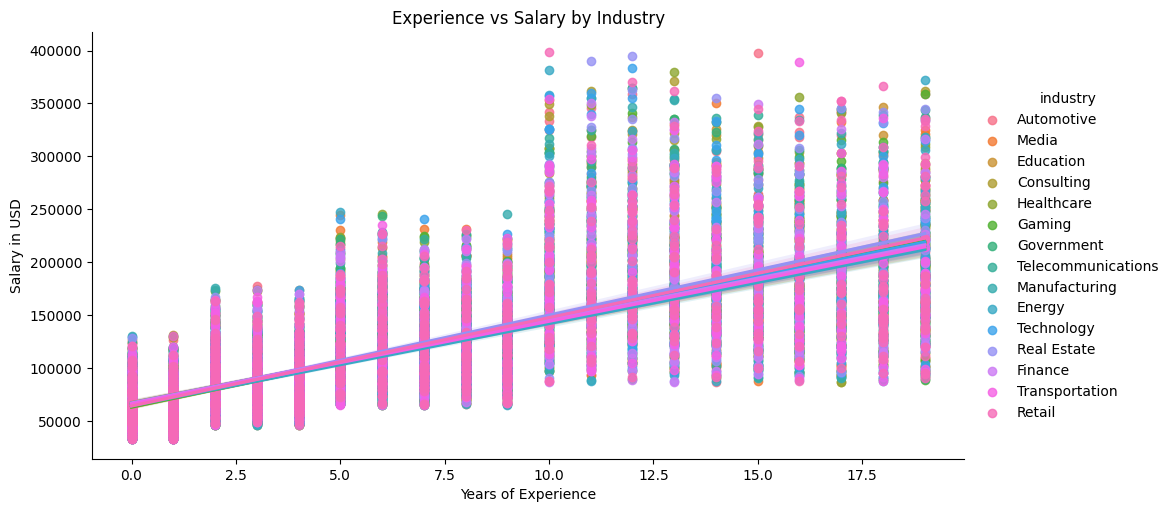

In [ ]:
sns.lmplot(x='years_experience', y='salary_usd', hue='industry',data=df, aspect=2)
plt.title('Experience vs Salary by Industry')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in USD')
plt.show()

On the basis of above analysis we can say that more no of experience lead to higher salaries.
But if we furthur analyse it on basis of industry some industries like transportation industry provide lowest salaries 
where the industries like Technology,Energy,Manufacturing are provide good salaries at minium years of experience

12.Which country offer highest benefit scores? And at what Experience level one would get highest benefit scores?

In [11]:
location=df.groupby('company_location')['benefits_score'].mean().sort_values(ascending=False).head(5)
print(location)
print()
print('''1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)''')
Exp=df.groupby('experience_level')['benefits_score'].mean().sort_values(ascending=False)
print(Exp)

company_location
Denmark          7.601542
Canada           7.571261
United States    7.568508
India            7.568302
Finland          7.541610
Name: benefits_score, dtype: float64

1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)
experience_level
EN    7.522243
MI    7.520497
EX    7.499043
SE    7.475274
Name: benefits_score, dtype: float64


13.What is the maximum and minmum benefits score are provided to people in INDIA?

In [89]:
s=df[df['company_location']=='India'][['benefits_score','experience_level']].max()
print(s)
print()
df[df['company_location']=='India'][['benefits_score','experience_level']].min()

benefits_score      10.0
experience_level      SE
dtype: object



benefits_score      5.0
experience_level     EN
dtype: object

14.Find job title whose job location is India

In [15]:
df[df['company_location']=='India'][['job_title','company_location']]
# print(location)
# len(location)

,job_title,company_location
3,NLP Engineer,India
16,Principal Data Scientist,India
46,AI Research Scientist,India
51,Research Scientist,India
56,Autonomous Systems Engineer,India
...,...,...
14922,AI Software Engineer,India
14938,Head of AI,India
14947,Data Scientist,India
14951,AI Research Scientist,India


15.Find the most highpaying job 


In [60]:
m=df['salary_usd'].max()
print('highest salary', m)
df[df['salary_usd']==399095][['job_title','salary_usd','company_location']]

highest salary 399095


,job_title,salary_usd,company_location
9891,Machine Learning Researcher,399095,Switzerland


16.Find the most highpaying job in india

In [16]:
high=df[df['company_location']=='India'][['job_title','salary_usd']].max()
print(high) 

job_title     Robotics Engineer
salary_usd               203402
dtype: object


17.No of jobs according to salary

<function matplotlib.pyplot.show(close=None, block=None)>

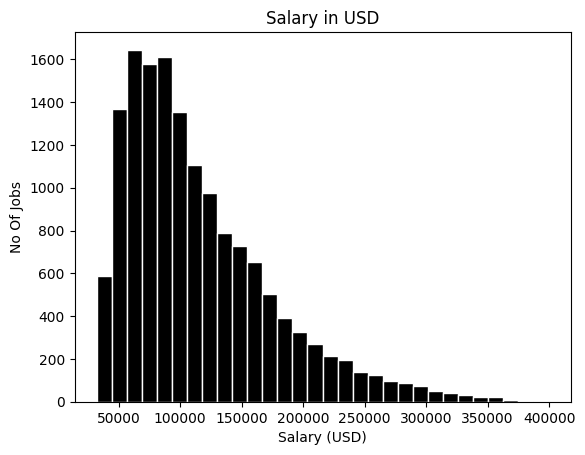

In [66]:

plt.hist(df['salary_usd'],bins=30,edgecolor='white',color='black')
plt.title("Salary in USD")
plt.xlabel("Salary (USD)")
plt.ylabel("No Of Jobs")
plt.show

18.Showing the salary in USD on the basis of experience level

1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)


<function matplotlib.pyplot.show(close=None, block=None)>

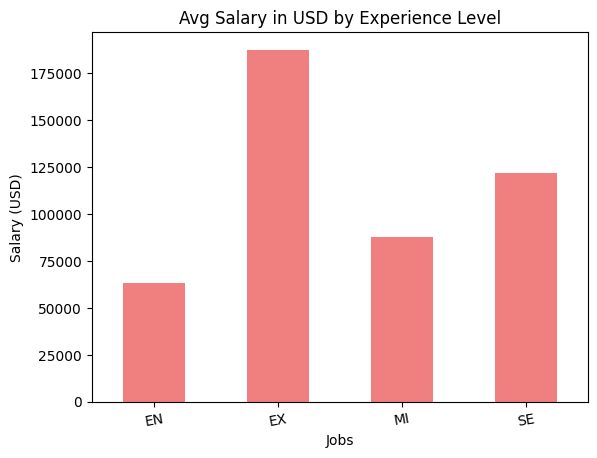

In [10]:
print('''1. MI :- Mid 
2. EX :- Executive
3. SE :- Senior
4. EN :- Entry(Fresher)''')
a=df.groupby('experience_level')['salary_usd'].mean()
a.plot(kind='bar',color='lightcoral')
plt.title("Avg Salary in USD by Experience Level")
plt.ylabel("Salary (USD)")
plt.xlabel("Jobs")
plt.xticks(rotation=10)
plt.show

From the above graph we conclude that those who are in executive position they have offerd maximum salary

19.Showing the no of jobs on the basis of Industry

<function matplotlib.pyplot.show(close=None, block=None)>

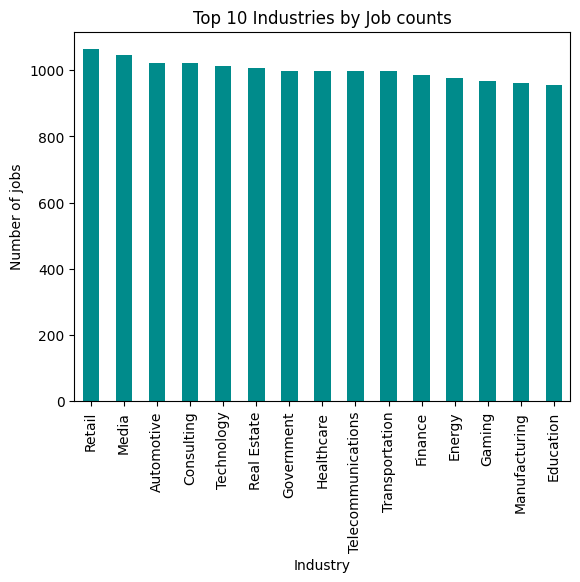

In [93]:

c=df['industry'].value_counts()
c.plot(kind='bar',color='darkcyan')
plt.title("Top 10 Industries by Job counts")
plt.ylabel("Number of jobs")
plt.xlabel("Industry")
plt.xticks(rotation=90)
plt.show

20.Which size company hires more? And which size company offers highest salary

company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64


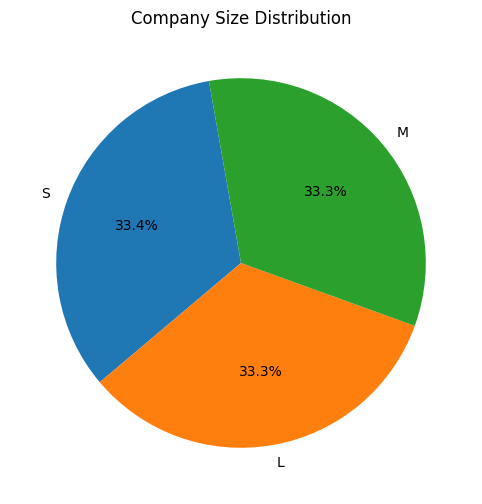

In [22]:
z=df['company_size'].value_counts()
print(z)

z = df['company_size'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(z.values, labels=z.index, autopct='%1.1f%%', startangle=100)
plt.title('Company Size Distribution')
plt.show()

company_size
L    130322.451781
M    113600.237037
S    102146.930098
Name: salary_usd, dtype: float64


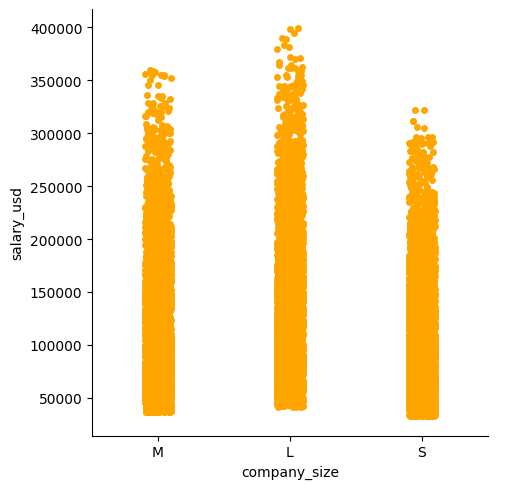

In [20]:
sz=df.groupby('company_size')['salary_usd'].mean().sort_values(ascending=False)
print(sz)
sns.catplot(x='company_size',y='salary_usd',kind='strip', color='orange' ,data=df)

From the above we conclude that large size companies offers high salaries.And Small size companies hires more employee